In [27]:
from linares_plot import *
import sys, os
prev_ = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_ = os.path.join(prev_, 'wm_representation', 'functions', 'IEM_conditions', 'tools')
sys.path.insert(1, path_)
from Representation_heatmap import Representation_heatmap

In [38]:
sep_channels=10
adjusted_size_contant = 48.519

pos_channels = np.arange(sep_channels/2,360,sep_channels)
pos_channels = [round(pos_channels[i],3) for i in range(0, len(pos_channels))]

pos_channels2 = np.arange(0,360,0.5)
pos_channels2 = [round(pos_channels2[i],3) for i in range(0, len(pos_channels2))]

def posch1_to_posch2(ch_1):
    return np.where(np.array(pos_channels2) == pos_channels[ch_1])[0][0]

In [39]:
def Representation_heatmap(df, ref_angle=180, condition='1_7'):
    plt.figure()
    plt.title('Heatmap decoding')
    ######midpoint = df.values.mean() # (df.values.max() - df.values.min()) / 2
    ax = sns.heatmap(df, yticklabels=list(df.index), cmap="coolwarm") # cmap= viridis "jet",  "coolwarm" RdBu_r, gnuplot, YlOrRd, CMRmap  , center = midpoint
    ax.plot([0.25, np.shape(df)[1]-0.25], [posch1_to_posch2(18),posch1_to_posch2(18)], 'k--')
    plt.yticks([posch1_to_posch2(4), posch1_to_posch2(13), posch1_to_posch2(22), posch1_to_posch2(31)] ,['45','135','225', '315'])
    plt.ylabel('Angle')
    plt.xlabel('time (s)')
    
    plt.show(block=False)
    

In [149]:
def Repres(df,  condition='1_0.2', ref_angle=180, TR=2.335, bin_=0.5, fs1=20, fs2=15):
    ##
    ##
    ##### pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    pal_cyan = 'viridis'
    #
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(df, cmap=pal_cyan, vmin=-0.2, vmax=0.2,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [-0.2, -0.1, 0, 0.1, 0.2], 'label': 'reconstruction activation (a.u)'})
    ax.figure.axes[-1].yaxis.label.set_size(fs1)
    ax.figure.axes[-1].tick_params(labelsize=fs2)
    
    plt.gca().set_ylabel('')
    plt.yticks([posch1_to_posch2(4), posch1_to_posch2(13), posch1_to_posch2(22), posch1_to_posch2(31)],['45','135','225', '315'])

    dims=np.shape(df)
    dimN = dims[0]
    plt.gca().set_ylim(dimN, -45)
    
    plt.plot([1,1], [posch1_to_posch2(18),posch1_to_posch2(18)], markersize=10, color='r', marker='>')
    
    ################################
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4  #start of the Hemodynamic response (4seconds)
    if condition == '1_0.2':
        condition_title = 'o:1, d:0.2'
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1/TR, 30/TR]
    elif condition=='1_7':
        condition_title = 'o:1, d:7'
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [1/TR, 30/TR]
    elif condition=='2_0.2':
        condition_title = 'o:2, d:0.2'
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [1/TR, 30/TR]
    elif condition=='2_7':
        condition_title = 'o:2, d:7'
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [1/TR, 35/TR]

    ##
    t_p1 = (start_hrf + t_p) ## strat of target (time)
    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    r_p1=  (start_hrf + r_t) ## start of response (time)
    ##
    plt.plot([t_p1/TR +bin_,t_p1/TR+bin_], [-15,-15], markersize=10, color='b', marker='v')
    plt.plot([d_p1/TR +bin_,d_p1/TR+bin_], [-15,-15], markersize=10, color='g', marker='v')
    plt.plot([r_p1/TR +bin_,r_p1/TR+bin_], [-15,-15], markersize=10, color='y', marker='v')
    plt.gca().set_xlim(xlim)
    
    plt.xticks(fontsize=fs2)
    plt.yticks(fontsize=fs2)
    plt.gca().set_ylabel('angle ($^\circ$)', fontsize=fs1)
    plt.gca().set_xlabel('time (s)', fontsize=fs1)
    #plt.title(condition_title)
    
    plt.show()

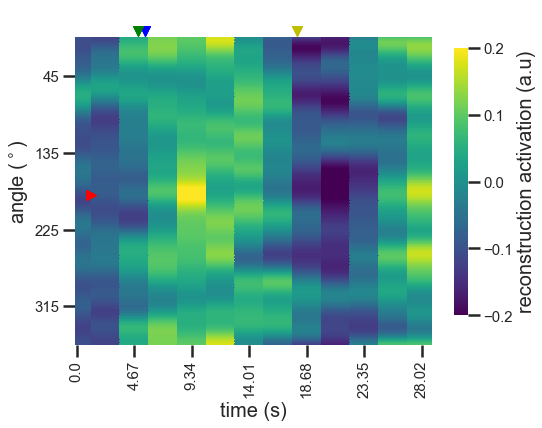

In [150]:
Repres(Df, condition='2_0.2')

In [54]:
posch1_to_posch2(4)

90

In [40]:
Df = pd.read_excel('C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_example_hetm.xlsx')

In [55]:
Df.head()

,0.0,2.335,4.67,7.005,9.34,11.675,14.01,16.345,18.68,21.015,23.35,25.685,28.02,30.355,32.69,35.025
0,-0.104967,-0.117022,0.043870,0.118454,0.097774,0.175396,-0.003503,-0.074797,-0.125978,-0.163051,-0.025641,0.086827,0.089137,0.103442,0.049734,-0.072350
1,-0.104913,-0.116290,0.044775,0.118663,0.097947,0.175947,-0.002783,-0.076918,-0.130472,-0.164787,-0.023353,0.090550,0.092871,0.105180,0.048180,-0.075249
2,-0.104936,-0.115547,0.045739,0.118960,0.098080,0.176357,-0.001916,-0.078882,-0.134973,-0.166541,-0.021174,0.094158,0.096647,0.106895,0.046530,-0.078132
3,-0.104964,-0.114690,0.046808,0.119288,0.098152,0.176489,-0.000872,-0.080586,-0.139313,-0.168121,-0.019183,0.097338,0.100130,0.108576,0.044977,-0.080814
4,-0.104991,-0.113693,0.047921,0.119573,0.098181,0.176577,0.000238,-0.082217,-0.143640,-0.169646,-0.017342,0.100241,0.103477,0.110197,0.043463,-0.083332


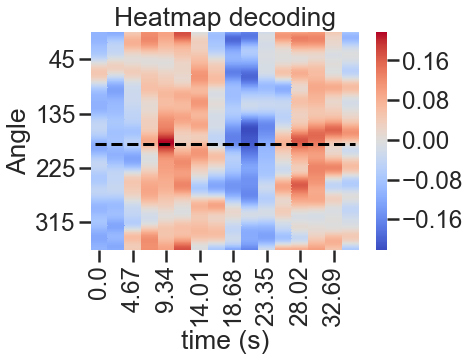

In [41]:
Representation_heatmap(Df)